In [61]:
import pandas as pd #导入pandas数据处理库
from sklearn.preprocessing import StandardScaler #导入标准差标准化函数
from sklearn.cluster import KMeans #导入聚类函数
from display import plot    # 导入自定义的绘图模块
from datetime import datetime
import matplotlib.pyplot as plt

#1.1数据探索：展示原始数据的尺寸
data1 = pd.read_csv('data1.csv', encoding='gb18030')  # 以指定格式读取数据
data2 = pd.read_csv('data2.csv', encoding='gb18030')  # 以指定格式读取数据
print('data1原始数据的尺寸为：',data1.shape) #显示原始数据的行数和列数
print('data2原始数据的尺寸为：',data2.shape) #显示原始数据的行数和列数

data1原始数据的尺寸为： (4341, 5)
data2原始数据的尺寸为： (519367, 12)


In [11]:
exp1 = data2['Money'].notnull()
#exp2 = data[''].notnull()
data2_notnull = data2[exp1 ]
print('删除缺失记录后数据的尺寸为：',data2_notnull.shape)

删除缺失记录后数据的尺寸为： (519367, 12)


In [14]:
'''
处理异常值1.2.1： 清除消费金额为负数的消费记录
'''
index1 = data2['Money'] < 0
data3 = data2[-(index1)]
print('删除消费金额为负数常记录后数据的尺寸为：',data3.shape)

删除消费金额为负数常记录后数据的尺寸为： (519367, 12)


In [15]:
print(data3.head())

       Index  CardNo     PeoNo             Date  Money  FundMoney  Surplus  \
0  117342773  181316  20181316  2019/4/20 20:17    3.0        0.0    186.1   
1  117344766  181316  20181316   2019/4/20 8:47    0.5        0.0    199.5   
2  117346258  181316  20181316   2019/4/22 7:27    0.5        0.0    183.1   
3  117308066  181317  20181317   2019/4/21 7:46    3.5        0.0     50.2   
4  117309001  181317  20181317  2019/4/19 22:31    2.5        0.0     61.7   

   CardCount Type TermSerNo  conOperNo    Dept  
0        818   消费       NaN        NaN    第一食堂  
1        814   消费       NaN        NaN    第二食堂  
2        820   消费       NaN        NaN    第二食堂  
3        211   消费       NaN        NaN  好利来食品店  
4        209   消费       NaN        NaN  好利来食品店  


In [17]:
print(data3['Date'].dtype)

object


In [20]:
data3['Date']=pd.to_datetime(data3['Date'])

In [21]:
data3['hour']=data3['Date'].dt.hour
print(data3['hour'])
print(data3.columns)

0         20
1          8
2          7
3          7
4         22
5         12
6         17
7         11
8         11
9         12
10        12
11        18
12        18
13        18
14        11
15        20
16        20
17        18
18        18
19         8
20         9
21        18
22         8
23        12
24        12
25        11
26        11
27        11
28        11
29        12
          ..
519337    11
519338    11
519339     7
519340    18
519341    15
519342    15
519343     7
519344    12
519345    11
519346     7
519347     7
519348    17
519349    16
519350    21
519351    11
519352    12
519353    18
519354     7
519355     7
519356    17
519357     7
519358    12
519359    11
519360     7
519361     7
519362    17
519363    17
519364     7
519365     7
519366    11
Name: hour, Length: 519367, dtype: int64
Index(['Index', 'CardNo', 'PeoNo', 'Date', 'Money', 'FundMoney', 'Surplus',
       'CardCount', 'Type', 'TermSerNo', 'conOperNo', 'Dept', 'hour'],
      dtype='object

In [22]:
'''
处理异常值1.2.2： 清除消费时间为半夜（23:00——06:00）的消费记录
'''
data4=data3[(data3['hour']>=6) & (data3['hour']<23)]


In [93]:
# print(data4)

In [166]:
#df =data4.to_csv('task1_1.csv')
#print(df)

None


In [23]:
data5 = pd.merge(data1,data4,how='outer',left_on='CardNo',right_on='CardNo')
data5

,Index_x,CardNo,Sex,Major,AccessCardNo,Index_y,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermSerNo,conOperNo,Dept,hour
0,1.0,180001,男,18国际金融,19762330.0,117331517.0,20181.0,2019-04-21 18:30:00,7.00,0.0,28.40,206.0,消费,NaN,NaN,第四食堂,18.0
1,1.0,180001,男,18国际金融,19762330.0,117341866.0,20181.0,2019-04-22 09:40:00,3.50,0.0,24.90,207.0,消费,NaN,NaN,第一食堂,9.0
2,1.0,180001,男,18国际金融,19762330.0,117154618.0,20181.0,2019-04-10 16:42:00,11.00,0.0,2.70,189.0,消费,NaN,NaN,第四食堂,16.0
3,1.0,180001,男,18国际金融,19762330.0,117200032.0,20181.0,2019-04-15 11:43:00,7.00,0.0,43.20,192.0,消费,NaN,NaN,第四食堂,11.0
4,1.0,180001,男,18国际金融,19762330.0,117206146.0,20181.0,2019-04-15 07:50:00,2.50,0.0,50.20,191.0,消费,NaN,NaN,第一食堂,7.0
5,1.0,180001,男,18国际金融,19762330.0,117367323.0,20181.0,2019-04-23 09:52:00,2.00,0.0,15.90,209.0,消费,NaN,NaN,第二食堂,9.0
6,1.0,180001,男,18国际金融,19762330.0,117378955.0,20181.0,2019-04-23 11:53:00,7.00,0.0,8.90,210.0,消费,NaN,NaN,第四食堂,11.0
7,1.0,180001,男,18国际金融,19762330.0,117380758.0,20181.0,2019-04-22 17:42:00,7.00,0.0,17.90,208.0,消费,NaN,NaN,第四食堂,17.0
8,1.0,180001,男,18国际金融,19762330.0,117222956.0,20181.0,2019-04-16 07:44:00,1.60,0.0,32.60,195.0,消费,NaN,NaN,第二食堂,7.0
9,1.0,180001,男,18国际金融,19762330.0,117229404.0,20181.0,2019-04-16 07:46:00,2.00,0.0,30.60,196.0,消费,NaN,NaN,第二食堂,7.0


In [171]:
#df2 =data5.to_csv('task1_1_1.csv')
#print(df2)

None


In [24]:
print(data4.head(1))

       Index  CardNo     PeoNo                Date  Money  FundMoney  Surplus  \
0  117342773  181316  20181316 2019-04-20 20:17:00    3.0        0.0    186.1   

   CardCount Type TermSerNo  conOperNo  Dept  hour  
0        818   消费       NaN        NaN  第一食堂    20  


In [97]:
# 任务2.数据准备
# 1.增加一列"weekday",用以判断是否为工作日
data4['weekday'] = data4['Date'].apply(lambda x: x.weekday()+1) # 提取星期
data4

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermSerNo,conOperNo,Dept,hour,weekday
0,117342773,181316,20181316,2019-04-20 20:17:00,3.0,0.0,186.10,818,消费,NaN,NaN,第一食堂,20,6
1,117344766,181316,20181316,2019-04-20 08:47:00,0.5,0.0,199.50,814,消费,NaN,NaN,第二食堂,8,6
2,117346258,181316,20181316,2019-04-22 07:27:00,0.5,0.0,183.10,820,消费,NaN,NaN,第二食堂,7,1
3,117308066,181317,20181317,2019-04-21 07:46:00,3.5,0.0,50.20,211,消费,NaN,NaN,好利来食品店,7,7
4,117309001,181317,20181317,2019-04-19 22:31:00,2.5,0.0,61.70,209,消费,NaN,NaN,好利来食品店,22,5
5,117340105,181317,20181317,2019-04-20 12:14:00,8.0,0.0,53.70,210,消费,NaN,NaN,第三食堂,12,6
6,117340374,181317,20181317,2019-04-21 17:17:00,9.0,0.0,41.20,212,消费,NaN,NaN,第三食堂,17,7
7,117340515,181317,20181317,2019-04-22 11:48:00,8.0,0.0,33.20,213,消费,NaN,NaN,第三食堂,11,1
8,117305210,181318,20181318,2019-04-21 11:58:00,0.0,100.0,147.90,676,存款,NaN,NaN,财务处,11,7
9,117331420,181318,20181318,2019-04-20 12:05:00,7.0,0.0,53.40,673,消费,NaN,NaN,第四食堂,12,6


In [29]:
# 任务2.1提取数据
# 2.1.1分组求和
data_gb = data4['CardCount'].groupby(data4['Dept']).sum()
print(data_gb)

Dept
人文社科          99846
医务室          821891
基础课部          62229
外语系           10052
好利来食品店     28262706
宿管办           37897
工商系部         185690
教师食堂        2803601
旅游系            3284
机电系          125902
水电缴费处       3378168
第一图书馆        286286
第一教学楼         11204
第一食堂       66399808
第七教学楼        169829
第三教学楼         55762
第三食堂       49467061
第二图书馆        373037
第二食堂      165409172
第五教学楼         85568
第五食堂      109964720
第六教学楼        159182
第四教学楼         32993
第四食堂       59946992
红太阳超市      12792008
自然科学书库       173918
艺术设计学院       139192
财务处        17692345
财务部          112044
财经系           25388
青鸾苑宿管办        31901
飞凤轩宿管办        57094
Name: CardCount, dtype: int64


In [36]:
#2.1.2提取食堂的消费数据，可以用isin函数。
index=['第一食堂','第二食堂','第三食堂','第四食堂','第五食堂','教师食堂',]
data_st = data4.loc[data4['Dept'].isin(index)]
print(data_st.head(10))

        Index  CardNo     PeoNo                Date  Money  FundMoney  \
0   117342773  181316  20181316 2019-04-20 20:17:00    3.0        0.0   
1   117344766  181316  20181316 2019-04-20 08:47:00    0.5        0.0   
2   117346258  181316  20181316 2019-04-22 07:27:00    0.5        0.0   
5   117340105  181317  20181317 2019-04-20 12:14:00    8.0        0.0   
6   117340374  181317  20181317 2019-04-21 17:17:00    9.0        0.0   
7   117340515  181317  20181317 2019-04-22 11:48:00    8.0        0.0   
9   117331420  181318  20181318 2019-04-20 12:05:00    7.0        0.0   
10  117331481  181318  20181318 2019-04-21 12:00:00    7.0        0.0   
11  117332225  181318  20181318 2019-04-19 18:14:00    8.0        0.0   
12  117332578  181318  20181318 2019-04-21 18:46:00    7.0        0.0   

    Surplus  CardCount Type TermSerNo  conOperNo  Dept  hour  
0     186.1        818   消费       NaN        NaN  第一食堂    20  
1     199.5        814   消费       NaN        NaN  第二食堂     8  
2     1

In [145]:
#2.1.3.分别提取早中晚各食堂就餐人数
#2..1.3.1提取早上7、8点的数据
data_morning = data_st.loc[(data4['hour'].apply(lambda x: x in [7, 8])),  :]
data_morning

,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermSerNo,conOperNo,Dept,hour
1,117344766,181316,20181316,2019-04-20 08:47:00,0.5,0.0,199.50,814,消费,NaN,NaN,第二食堂,8
2,117346258,181316,20181316,2019-04-22 07:27:00,0.5,0.0,183.10,820,消费,NaN,NaN,第二食堂,7
19,117316222,181320,20181320,2019-04-20 08:53:00,1.5,0.0,6.20,784,消费,NaN,NaN,第二食堂,8
22,117324075,181320,20181320,2019-04-20 08:52:00,2.7,0.0,7.70,783,消费,NaN,NaN,第二食堂,8
38,117322749,181322,20181322,2019-04-22 07:18:00,1.0,0.0,196.70,1148,消费,NaN,NaN,第二食堂,7
42,116936780,74281,20094277,2019-04-03 08:23:00,1.6,0.0,41.30,1669,消费,NaN,NaN,第二食堂,8
43,116951707,74281,20094277,2019-04-03 08:25:00,1.5,0.0,39.80,1670,消费,NaN,NaN,第二食堂,8
59,116954891,74731,20094725,2019-04-01 08:34:00,2.0,0.0,71.59,1487,消费,NaN,NaN,第二食堂,8
61,116969864,74731,20094725,2019-04-01 08:35:00,1.5,0.0,70.09,1488,消费,NaN,NaN,第一食堂,8
76,116969872,76183,20096175,2019-04-01 08:49:00,2.0,0.0,48.19,3646,消费,NaN,NaN,第一食堂,8


In [86]:
#2.1.3.2提取中午11.12.13点的数据
data_noon = data_st.loc[(data4['hour'].apply(lambda x: x in [11, 12, 13])),  :]
# data_noon 

In [48]:
#2.1.3.3提取早上17,18,19点的数据
data_night = data_st.loc[(data4['hour'].apply(lambda x: x in [17,18,19])),  :]
# data_night

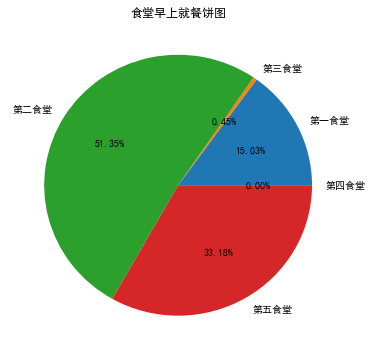

In [90]:
# 2.2绘图
# 2.2.11早上食堂分组求和
st_gb_morning = data_morning['CardCount'].groupby(data_morning['Dept']).sum()
# st_gb_morning
# 2.2.12绘制食堂就餐饼图
plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
fig=plt.figure(figsize=(6,6))
y = data_morning['CardCount'].groupby(data_morning['Dept']).sum()
x=y.index
plt.pie(y,labels=x,autopct='%.2f%%',)
plt.title('食堂早上就餐饼图')
plt.show()

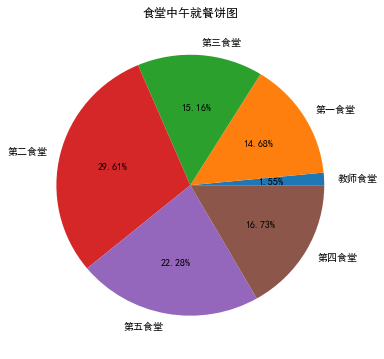

In [89]:
# 2.2.21中午食堂分组求和
st_gb_noon= data_noon['CardCount'].groupby(data_noon['Dept']).sum()
# st_gb_noon
# 2.2.22绘制食堂中午就餐饼图
plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
fig=plt.figure(figsize=(6,6))
y = data_noon['CardCount'].groupby(data_noon['Dept']).sum()
x=y.index
plt.pie(y,labels=x,autopct='%.2f%%',)
plt.title('食堂中午就餐饼图')
plt.show()

In [60]:
# 2.2.31晚上食堂分组求和
st_gb_night = data_night['CardCount'].groupby(data_night['Dept']).sum()
# st_gb_night

Dept
第一食堂    15614551
第三食堂    17857886
第二食堂    40473932
第五食堂    26565880
第四食堂    25061970
Name: CardCount, dtype: int64

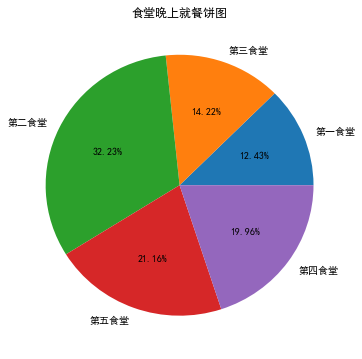

In [92]:
# 2.2.32绘制食堂晚上就餐饼图
plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
fig=plt.figure(figsize=(6,6))
y = data_night['CardCount'].groupby(data_night['Dept']).sum()
x=y.index
plt.pie(y,labels=x,autopct='%.2f%%',)
plt.title('食堂晚上就餐饼图')
plt.show()

In [146]:
# 2.3绘制折线图
# 2.3.1区分工作日数据和非工作日数据
data_workday = data4.loc[(data4['weekday'].apply(lambda x: x in [6,7])),  :] #工作日数据
data_weekend = data4.loc[(data4['weekday'].apply(lambda x: x in [1,2,3,4,5])),  :] #非工作日数据
data_weekend.head(5)

,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermSerNo,conOperNo,Dept,hour,weekday
2,117346258,181316,20181316,2019-04-22 07:27:00,0.5,0.0,183.1,820,消费,NaN,NaN,第二食堂,7,1
4,117309001,181317,20181317,2019-04-19 22:31:00,2.5,0.0,61.7,209,消费,NaN,NaN,好利来食品店,22,5
7,117340515,181317,20181317,2019-04-22 11:48:00,8.0,0.0,33.2,213,消费,NaN,NaN,第三食堂,11,1
11,117332225,181318,20181318,2019-04-19 18:14:00,8.0,0.0,60.4,672,消费,NaN,NaN,第四食堂,18,5
14,117338828,181318,20181318,2019-04-22 11:32:00,7.0,0.0,119.9,680,消费,NaN,NaN,第四食堂,11,1


In [110]:
# 2.3.2分别区分每个小时的数据
workday_y=data4['CardCount'].groupby(data_workday['hour']).sum()
workday_y

hour
6.0       492092
7.0      4116473
8.0      4231655
9.0      3535836
10.0     2621292
11.0    14808496
12.0    11548192
13.0     2255935
14.0      397976
15.0      342262
16.0     1222164
17.0     9643223
18.0    10007172
19.0     4266735
20.0     1697293
21.0     1351148
22.0      889210
Name: CardCount, dtype: int64

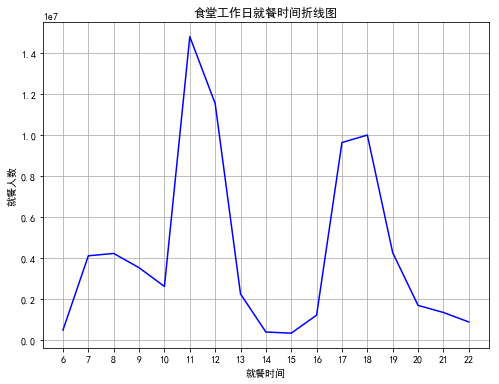

In [148]:
# 2.3.2绘图
# 2.3.2.1绘制食堂工作日就餐时间折线图

plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
fig=plt.figure(figsize=(8,6))
plt.grid()
y = data4['CardCount'].groupby(data_workday['hour']).sum()
x=y.index
plt.title('食堂工作日就餐时间折线图')   
# 设置x轴的刻度
plt.xticks(range(0,24 )) # 最后一位取不到，所以要加1

plt.xlabel('就餐时间')   # 设置x轴标签
plt.ylabel('就餐人数')  # 设置y轴标签
plt.plot(x,y,c='b')
# plt.savefig('workday.jpg')
plt.show()

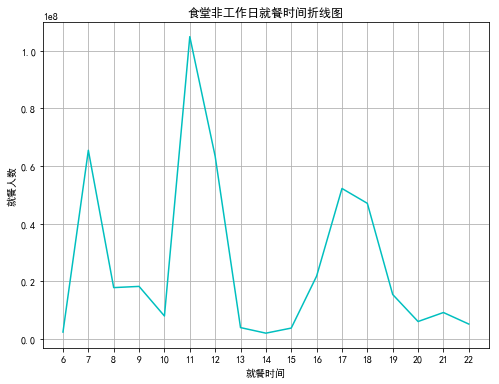

In [147]:
# 2.3.2.2绘制食堂非工作日就餐时间折线图

plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
fig=plt.figure(figsize=(8,6))
plt.grid()
y = data4['CardCount'].groupby(data_weekend['hour']).sum()
x=y.index
plt.title('食堂非工作日就餐时间折线图')
# 设置x轴的刻度
plt.xticks(range(0,24 )) # 最后一位取不到，所以要加1
plt.xlabel('就餐时间')   # 设置x轴标签
plt.ylabel('就餐人数')  # 设置y轴标签
plt.plot(x,y,c='c')
# plt.savefig('weekend.jpg')
plt.show()
